# Test of model - from url

## Importing librairies

In [3]:
import keras

print("Versão do Keras:", keras.__version__)


Versão do Keras: 3.2.1


In [1]:
import os
from keras.models import load_model
import keras
import tensorflow as tf
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('model/model_v0.h5')

In [3]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [4]:
genre = [
    "Abstractionism",
    "Baroque",            
    "Cubism",
    "Renaissance",
    "Post_Impressionism",
    "Surrealism",
    "Symbolism"
]

In [10]:
#genre=['Impressionism', 'Early Renaissance', 'Post-Impressionism', 'Symbolism', 'Baroque']

def transform_url(img):
    # Predict from web
    #web_image = imageio.imread(url)
    web_image = cv2.imread(img)
    web_image = cv2.resize(web_image, dsize=(125,125) )
    #web_image = image.img_to_array(web_image)
    web_image = web_image/255.0
    web_image = np.expand_dims(web_image, axis=0)
    return web_image

# def predict_url(web_image):
#     prediction = probability_model.predict(web_image)
#     prediction_probability = np.amax(prediction)
#     prediction_idx = np.argmax(prediction)

#     print("Predicted genre =", genre[prediction_idx])
#     print("Prediction probability =", round(((prediction_probability)*100),2), "%")

#     pred=plt.imshow(imageio.imread(url))
#     plt.axis('off')
#     plt.show()
#     return pred




def predict_url(web_image):
    prediction = probability_model.predict(web_image)
    top_indices = np.argsort(prediction[0])[-3:][::-1]  # Obtém os índices dos três maiores valores
    top_styles = [genre[idx] for idx in top_indices]  # Obtém os nomes dos estilos correspondentes
    top_probabilities = [prediction[0][idx] for idx in top_indices]  # Obtém as probabilidades correspondentes

    for style, prob in zip(top_styles, top_probabilities):
        print(f"Predicted genre: {style}, Prediction probability: {round(prob * 100, 2)}%")

    plt.imshow(imageio.imread(url))
    plt.axis('off')
    plt.show()


In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 125, 125, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 123, 123, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 59, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,863,189 (10.92 MB)

 Trainable params: 2,863,181 (10.92 MB)

 Non-trainable params: 6 (24.00 B)

 Optimizer params: 2 (12.00 B)

# Final project Ironhack

## Testing the model

In [8]:
genre

['Abstractionism',
 'Baroque',
 'Cubism',
 'Renaissance',
 'Post_Impressionism',
 'Surrealism',
 'Symbolism']

C:\Users\sayur\AppData\Local\Temp\ipykernel_121092\3334906683.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  web_image = imageio.imread(url)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted genre: Renaissance, Prediction probability: 23.87%
Predicted genre: Surrealism, Prediction probability: 14.84%
Predicted genre: Post_Impressionism, Prediction probability: 12.73%


C:\Users\sayur\AppData\Local\Temp\ipykernel_121092\3334906683.py:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(url))


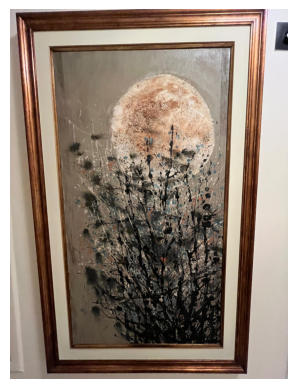

In [22]:
#url=input("please enter an image url to test the model !")
url = 'teste.jpeg'
web_image=transform_url(url)
test_prediction=predict_url(web_image)

Examples of url
* https://3.bp.blogspot.com/-JYgEVcB8kHo/XI-w1i6QdVI/AAAAAAAGVvA/1ssGxibWfTkKQQq0PSA0769zO0nqp_YoACLcBGAs/s1600/Johannes-Vermeer-Girl-with-a-Pearl-Earring-1665.jpg
* https://d2jv9003bew7ag.cloudfront.net/uploads/Vincent-van-Gogh-Starry_Night_Over_the_Rhone.-Image-via-wikimedia.org_-865x577.jpg